Dependencies: Add Your dependencies here



In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

Load the data

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
df.shape

(7613, 5)

Plot the count for each target

In [4]:
from collections import Counter
c = Counter(df['target'])
print(c)

Counter({0: 4342, 1: 3271})


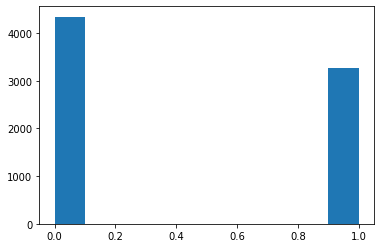

In [5]:
plt.hist(df['target'])
plt.show()

Print the unique keywords

In [6]:
unique_keywords = df['keyword'].unique()
unique_keywords = unique_keywords[1:]
unique_keywords

array(['ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'derailed

Plot the count of each keyword

In [7]:
c = Counter(df['keyword'])
counts = []
for i in unique_keywords:
  counts.append(c[i])
print(c)

Counter({nan: 61, 'fatalities': 45, 'armageddon': 42, 'deluge': 42, 'body%20bags': 41, 'damage': 41, 'harm': 41, 'sinking': 41, 'collided': 40, 'evacuate': 40, 'fear': 40, 'outbreak': 40, 'siren': 40, 'twister': 40, 'windstorm': 40, 'collision': 39, 'derailment': 39, 'earthquake': 39, 'explosion': 39, 'famine': 39, 'flames': 39, 'hellfire': 39, 'sinkhole': 39, 'sunk': 39, 'weapon': 39, 'weapons': 39, 'whirlwind': 39, 'wreckage': 39, 'wrecked': 39, 'ambulance': 38, 'blaze': 38, 'bombed': 38, 'deaths': 38, 'derailed': 38, 'drowned': 38, 'explode': 38, 'fatal': 38, 'fire': 38, 'flooding': 38, 'hurricane': 38, 'injury': 38, 'oil%20spill': 38, 'thunder': 38, 'typhoon': 38, 'upheaval': 38, 'bioterror': 37, 'blizzard': 37, 'burning%20buildings': 37, 'crush': 37, 'curfew': 37, 'debris': 37, 'destroy': 37, 'emergency': 37, 'fatality': 37, 'hostages': 37, 'mudslide': 37, 'pandemonium': 37, 'panic': 37, 'police': 37, 'quarantined': 37, 'ruin': 37, 'sandstorm': 37, 'wounded': 37, 'wreck': 37, 'abl

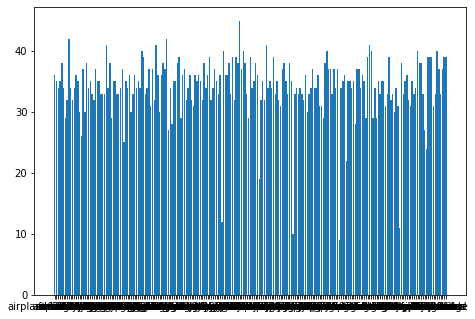

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(unique_keywords,counts)
plt.show()

Is there any correlation of the length of a tweet with its target. Try to visualize

In [9]:
for i in range(df.shape[0]): 
  df.loc[i,'len_tweet'] = len(df.iloc[i,3])
df.head()

,id,keyword,location,text,target,len_tweet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88.0


In [10]:
relation = df[['len_tweet','target']].corr()
relation

,len_tweet,target
len_tweet,1.000000,0.181817
target,0.181817,1.000000


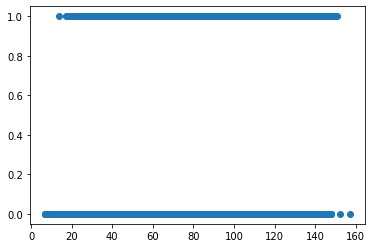

In [ ]:
#There is a positive correlation
plt.scatter(df['len_tweet'],df['target'])
plt.show()

Print the number of null values in each column

In [11]:
for i in df.columns:
  print(i+ ' column has {} NULL values'.format(df[i].isna().sum()))

id column has 0 NULL values
keyword column has 61 NULL values
location column has 2533 NULL values
text column has 0 NULL values
target column has 0 NULL values
len_tweet column has 0 NULL values


Remove the null values

In [12]:
df = df.dropna(axis = 'rows')
df.head()

,id,keyword,location,text,target,len_tweet
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55.0
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,67.0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82.0
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,34.0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76.0


Remove:


1.   Double Spaces
2.   Hypens and arrows
3.   Emojis
4.   URL
5.   Any other non english or special symbol

Replace wrong spellings with correct spellings



In [13]:
import string
import re
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def double_spaces(text):
  text = text.replace('  ',' ')
  return text
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [14]:
!pip install pyspellchecker
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

     |████████████████████████████████| 2.7MB 6.0MB/s 


In [15]:
for i in range(df.shape[0]):
  df.iloc[i,3] = remove_urls(df.iloc[i,3])
  df.iloc[i,3] = double_spaces(df.iloc[i,3])
  df.iloc[i,3] = remove_punctuation(df.iloc[i,3])
  df.iloc[i,3] = remove_emoji(df.iloc[i,3])
  df.iloc[i,3] = correct_spellings(df.iloc[i,3])

In [16]:
df.head()

,id,keyword,location,text,target,len_tweet
31,48,ablaze,Birmingham,bbcmtd Wholesale Markets ablaze,1,55.0
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy metal RT,0,67.0
33,50,ablaze,AFRICA,AFRICANBAZE Breaking newsNigeria flag set abla...,1,82.0
34,52,ablaze,"Philadelphia, PA",Crying out for more Set me ablaze,0,34.0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,76.0


Plot a word cloud of real target and fake target

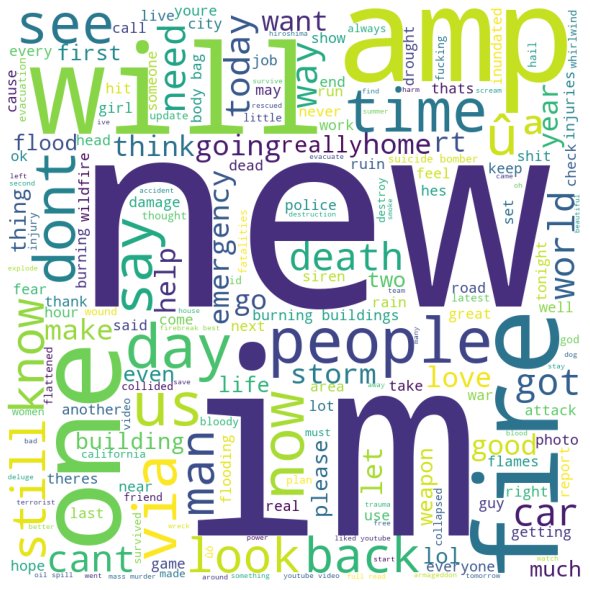

In [17]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
for val in df.text:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [18]:
x1 = [] # text for target = 1
x0 = [] # text for target = 0
for i in range(df.shape[0]):
  if df.iloc[i,3]==1:
    x1.append(df.iloc[i,0])
  else:
    x0.append(df.iloc[i,0])

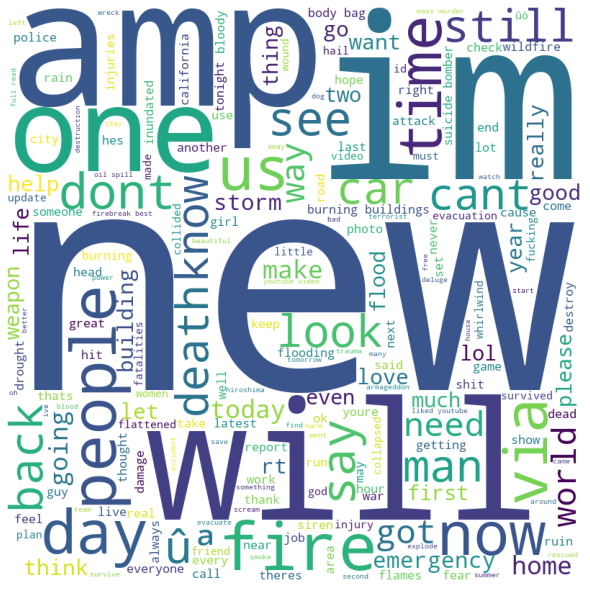

In [19]:
# for real target
for val in x1:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

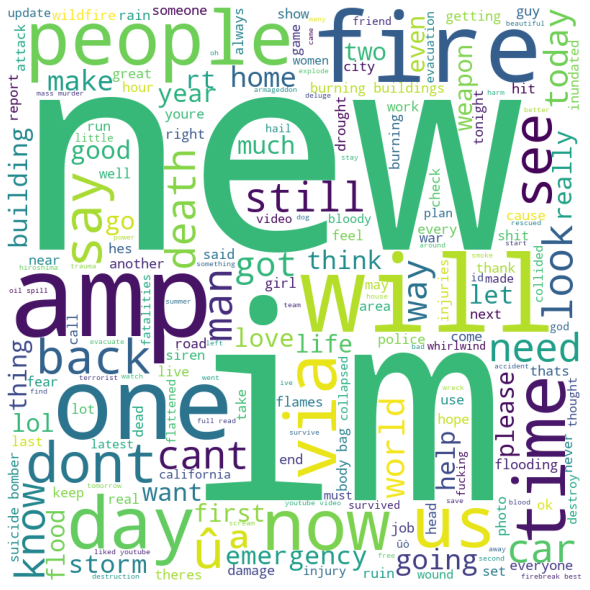

In [20]:
#for fake target
for val in x0:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Keep only text and target column in the dataset

In [21]:
df = df.iloc[:,3:5]
df.head()

,text,target
31,bbcmtd Wholesale Markets ablaze,1
32,We always try to bring the heavy metal RT,0
33,AFRICANBAZE Breaking newsNigeria flag set abla...,1
34,Crying out for more Set me ablaze,0
35,On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0


Split data into train and validation

In [22]:
from sklearn.model_selection import train_test_split
x = df['text']
y = df['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_test.head()

1754    Anti Collision Rear technology cool Via Teches...
7388    Insurance Texas Seeks Comment on Rules for Cha...
7386    New roof and hardy upWindstorm inspection tomo...
2020    lao fuckyou changed his for damage control Pse...
4943    meltdown of proportions commences I manage to ...
Name: text, dtype: object

Print the count of unique words

In [23]:
words = []
for i in range(df.shape[0]):
  words+=df.iloc[i,0].split()
c = Counter(words)
print(c)

Counter({'the': 1771, 'a': 1273, 'to': 1258, 'in': 1196, 'of': 1188, 'and': 889, 'I': 826, 'for': 572, 'is': 551, 'on': 535, 'you': 447, 'with': 386, 'it': 379, 'The': 373, 'that': 363, 'my': 352, 'at': 341, 'by': 303, 'be': 278, 'was': 259, 'have': 255, 'from': 250, 'this': 240, 'are': 235, 'i': 216, 'like': 213, 'A': 208, 'as': 205, 'amp': 196, 'but': 185, 'just': 181, 'up': 177, 'your': 170, 'out': 168, 'Im': 168, 'me': 165, 'will': 162, 'not': 161, 'so': 160, 'has': 155, 'via': 153, 'an': 144, 'about': 135, 'after': 135, 'get': 134, 'no': 128, 'all': 123, 'when': 121, 'In': 120, 'been': 119, 'or': 118, 'fire': 117, 'its': 116, '2': 114, 'people': 112, 'now': 109, 'he': 109, 'who': 106, 'we': 105, 'over': 105, 'into': 104, 'one': 104, 'what': 98, 'more': 97, 'dont': 95, 'do': 91, 'than': 90, 'can': 89, 'if': 88, 'new': 87, 'were': 87, 'they': 80, 'know': 77, 'would': 77, 'how': 77, 'New': 76, 'buildings': 76, 'This': 75, 'off': 73, 'his': 70, 'day': 70, 'there': 68, 'You': 68, 'her'

Compute the Term-Document Matrix (TDM) for all classes.

Use CountVectorizer of sklearn and print the dataframe with number of columns = number of unique words and the row showing the count of that word in a sentence.

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(x)
df_new = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df_new

,0011,001116,005225,0104,010401,012032,012624,02,0215,03,0306,030811,034,0400,045,05,05082015,06,0605,061,063424,06jst,07,070,0700,0730,075,080,0800,0802pm,080615,08072015,08315,0913,0936,10,100,1000,10000,100000,...,ûïairplane,ûïall,ûïbasedgeorgie,ûïbbcengland,ûïcat,ûïdetonate,ûïdylanmcclure55,ûïfdny,ûïfor,ûïhannaph,ûïhatchet,ûïi,ûïkeits,ûïleejasper,ûïleoblakecarter,ûïlolgop,ûïlordbrathwaite,ûïlove,ûïmake,ûïnews,ûïnobody,ûïnumbers,ûïplans,ûïrichmond,ûïsippin,ûïsplottdave,ûïstretcher,ûïthat,ûïthe,ûïthehighfessions,ûïwe,ûïwhen,ûïymcglaun,ûïyou,ûò,ûò800000,ûó,ûóbbc,ûóher,ûónegligence
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5075,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5076,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5077,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [26]:
x1 = [] # text for target = 1
x0 = [] # text for target = 0
for i in range(df.shape[0]):
  if df.iloc[i,1]==1:
    x1.append(df.iloc[i,0])
  else:
    x0.append(df.iloc[i,0])

In [27]:
# class of target = 1
X1 = vec.fit_transform(x1)
df_new1 = pd.DataFrame(X1.toarray(), columns=vec.get_feature_names())
df_new1

,0011,001116,005225,0104,010401,012032,012624,030811,0400,05,05082015,06,061,063424,07,070,075,080,0800,0802pm,080615,0936,10,100,1000,10000,1000s,100bn,101,103,1030,1030pm,103424,1038pm,1040,10401,1040pm,105,10m,10monthold,...,zones,zotar50,zurich,ââ,åè,åê,åêfedex,åêi,ûturns,ûª,ûªarabia,ûªm,ûªs,ûªt,ûªve,ûï,ûïa,ûïairplane,ûïbasedgeorgie,ûïbbcengland,ûïdetonate,ûïfdny,ûïhannaph,ûïhatchet,ûïlolgop,ûïlordbrathwaite,ûïmake,ûïnumbers,ûïrichmond,ûïsplottdave,ûïthat,ûïthe,ûïwhen,ûïyou,ûò,ûò800000,ûó,ûóbbc,ûóher,ûónegligence
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2192,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2193,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
# class of target = 0
X0 = vec.fit_transform(x0)
df_new0 = pd.DataFrame(X0.toarray(), columns=vec.get_feature_names())
df_new0

,02,0215,03,0306,034,045,05,06,0605,06jst,0700,0730,08072015,08315,0913,10,100,1000,100000,100mb,100nd,100s,101,1028,103,106,1061,1061thetwister,1079,109,10pm,11,11000,112,1130,12,1200,124,125,12jst,...,åç,åè,åèmgnafricaå,åê,ìñ1,ìü,û1,ûahhh,ûone,ûthat,ûyou,ûª,ûªd,ûªm,ûªre,ûªs,ûªt,ûªve,ûïa,ûïafter,ûïall,ûïcat,ûïdylanmcclure55,ûïfor,ûïi,ûïkeits,ûïleejasper,ûïleoblakecarter,ûïlove,ûïnews,ûïnobody,ûïplans,ûïsippin,ûïstretcher,ûïthe,ûïthehighfessions,ûïwe,ûïymcglaun,ûò,ûó
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2880,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2881,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2882,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Frequency of words in class 0 and 1

In [29]:
words0 = []
for i in range(len(x0)):
  words0 += x0[i].split(' ')
c0 = Counter(words0)
print(c0)

Counter({'the': 1048, 'to': 772, 'a': 754, 'I': 649, 'of': 589, 'and': 550, 'in': 507, 'you': 359, 'is': 345, 'for': 324, 'my': 286, 'on': 255, 'it': 248, 'with': 242, 'that': 240, 'The': 212, 'be': 198, 'have': 163, 'this': 153, 'like': 151, 'i': 150, 'by': 150, 'was': 146, 'at': 143, 'Im': 140, 'your': 135, 'me': 134, 'are': 130, 'but': 128, 'just': 127, 'out': 122, 'amp': 121, 'from': 120, 'so': 119, 'up': 118, 'will': 113, 'as': 112, 'not': 105, 'get': 104, 'A': 95, 'has': 93, 'about': 93, 'all': 93, 'or': 88, 'he': 82, 'an': 81, 'no': 78, 'now': 77, 'we': 77, 'its': 73, 'new': 71, 'can': 71, 'one': 67, 'via': 67, 'what': 66, 'dont': 66, 'do': 66, 'if': 64, 'when': 63, 'into': 62, 'more': 59, '2': 59, 'know': 57, 'would': 57, 'been': 57, 'how': 56, 'You': 56, 'If': 55, 'Full': 54, 'her': 53, 'see': 52, 'New': 52, 'they': 51, 'who': 51, 'people': 51, 'In': 50, 'day': 50, 'got': 49, 'My': 49, 'his': 49, 'time': 48, 'after': 46, 'body': 46, 'cant': 45, 'still': 45, 'going': 44, 'back'

In [30]:
words1 = []
for i in range(len(x1)):
  words1 += x1[i].split(' ')
c1 = Counter(words1)
print(c1)

Counter({'the': 723, 'in': 689, 'of': 599, 'a': 519, 'to': 486, 'and': 339, 'on': 280, 'for': 248, 'is': 206, 'at': 198, 'I': 177, 'The': 161, 'by': 153, 'with': 144, 'it': 131, 'from': 130, 'that': 123, 'was': 113, 'A': 113, 'are': 105, 'as': 93, 'have': 92, 'after': 89, 'you': 88, 'this': 87, 'fire': 86, 'via': 86, 'be': 80, 'amp': 75, 'In': 70, 'were': 68, 'over': 68, 'my': 66, 'i': 66, 'an': 63, 'been': 62, 'like': 62, 'has': 62, 'people': 61, 'California': 60, 'up': 59, 'when': 58, 'but': 57, 'than': 56, 'not': 56, 'buildings': 56, '2': 55, 'killed': 55, 'who': 55, 'just': 54, 'Hiroshima': 53, 'no': 50, 'will': 49, 'suicide': 48, 'MH370': 47, 'out': 46, 'News': 46, 'Legionnaires': 46, 'fires': 45, 'US': 45, 'police': 45, 'storm': 45, 'disaster': 44, 'This': 44, 'its': 43, 'burning': 43, 'into': 42, 'about': 42, 'so': 41, 'attack': 40, 'bomb': 40, 'crash': 39, 'families': 39, 'PM': 38, 'more': 38, 'train': 38, 'one': 37, 'off': 37, 'Police': 36, 'Fire': 36, 'your': 35, 'had': 32, '

Does the sum of the unique words in target 0 and 1 sum upto the total number of unique words in the whole document? Why or why not? Explain in report.

Total frequency

In [31]:
unique_words = list(set(words))
unique_words0 = list(set(words0))
unique_words1 = list(set(words1))
print('Sum of unique words in class1 = ', len(unique_words1))
print('Sum of unique words in class0 = ', len(unique_words0))
print('Sum of unique words in both classes = ', len(unique_words))


Sum of unique words in class1 =  8861
Sum of unique words in class0 =  11518
Sum of unique words in both classes =  16844


Calculate the probability for each word in a given class.

Class 0

In [32]:
probs0 = []
probs1 = []
for word in unique_words:
  if word in unique_words0:
    probs0.append(c0[word]/c[word])
  else:
    probs0.append(0)
  if word in unique_words1:
    probs1.append(c1[word]/c[word])
  else:
    probs1.append(0)

print(probs0)

[0.5, 0, 0.75, 0.5, 1.0, 0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0.5, 1.0, 0, 1.0, 0, 0.6666666666666666, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0.5, 0, 1.0, 1.0, 1.0, 0.9047619047619048, 0, 0.75, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7321428571428571, 0.5, 0.5, 0.8461538461538461, 1.0, 0.3333333333333333, 1.0, 1.0, 1.0, 0, 1.0, 0.6666666666666666, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0, 0, 0.5, 1.0, 1.0, 0, 1.0, 0.9, 0.25, 0, 0, 1.0, 0, 0, 1.0, 0, 0.5217391304347826, 1.0, 1.0, 0, 0, 0, 1.0, 0.7333333333333333, 1.0, 0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0.5, 0.5, 0, 0.6666666666666666, 1.0, 0, 0.5454545454545454, 1.0, 0.75, 1.0, 0, 0.3333333333333333, 0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.25, 0.7777777777777778, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 0.6153846153846154, 0, 1.0, 0.7878787878787878, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8, 0, 1.0, 1.0, 0.6666666666666666, 0.5714285714285714, 1.0, 1.0, 1.0, 1.0, 

Class 1

In [33]:
print(probs1)

[0.5, 1.0, 0.25, 0.5, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0.5, 0, 1.0, 0, 1.0, 0.3333333333333333, 0, 0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 0.5, 1.0, 0, 0, 0, 0.09523809523809523, 1.0, 0.25, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0.26785714285714285, 0.5, 0.5, 0.15384615384615385, 0, 0.6666666666666666, 0, 0, 0, 1.0, 0, 0.3333333333333333, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0.5, 0, 0, 1.0, 0, 0.1, 0.75, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0.4782608695652174, 0, 0, 1.0, 1.0, 1.0, 0, 0.26666666666666666, 0, 1.0, 0, 1.0, 0, 1.0, 0, 0, 0.5, 0.5, 1.0, 0.3333333333333333, 0, 1.0, 0.45454545454545453, 0, 0.25, 0, 1.0, 0.6666666666666666, 1.0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0.75, 0.2222222222222222, 1.0, 0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 0, 1.0, 0, 0.38461538461538464, 1.0, 0, 0.21212121212121213, 0, 0, 0, 0, 0, 0, 0.2, 1.0, 0, 0, 0.3333333333333333, 0.42857142857142855, 0, 0, 0, 0, 0.2727272727272727, 0.2, 1.0, 0.7758620689655172, 0.4, 0, 1.0, 0, 1.0, 0.428

We have calculated the probability of occurrence of word in a class, we can now substitute the values in the Baye's equation. 

If a word from the new sentence does not occur in the class within the training set, the equation becomes zero. This problem can be solved using smoothing like Laplace smoothing. 

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(x_train)
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tfidf = tf_transformer.transform(X_train_counts)
df_train = pd.DataFrame(X_train_tfidf.toarray(), columns=count_vect.get_feature_names())
df_train.head()

,0011,001116,005225,010401,012032,012624,02,0215,03,0306,030811,0400,045,05,06,0605,061,063424,06jst,07,070,0700,0730,075,0800,080615,08072015,0913,0936,10,100,1000,10000,100000,100bn,100mb,100nd,100s,101,1028,...,ûªt,ûªve,ûï,ûïa,ûïafter,ûïairplane,ûïall,ûïbasedgeorgie,ûïbbcengland,ûïcat,ûïdetonate,ûïdylanmcclure55,ûïfdny,ûïfor,ûïhannaph,ûïi,ûïkeits,ûïleejasper,ûïleoblakecarter,ûïlolgop,ûïlordbrathwaite,ûïlove,ûïmake,ûïnobody,ûïnumbers,ûïplans,ûïrichmond,ûïsippin,ûïstretcher,ûïthat,ûïthe,ûïthehighfessions,ûïwhen,ûïymcglaun,ûïyou,ûò,ûò800000,ûó,ûóbbc,ûóher
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
clf = MultinomialNB().fit(X_train_tfidf, y_train)
scores = cross_val_score(clf,X_train_tfidf,y_train,cv=5)
scores

array([0.78105781, 0.75645756, 0.7699877 , 0.78597786, 0.79187192])

In [43]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB())])
text_clf.fit(x_train,y_train)
text_clf.score(x_test,y_test)

0.7962598425196851

In [50]:
from sklearn import metrics
predicted = text_clf.predict(x_test)
print(metrics.classification_report(y_test, predicted, target_names=['class - 0','class - 1']))

              precision    recall  f1-score   support

   class - 0       0.76      0.92      0.83       566
   class - 1       0.86      0.64      0.74       450

    accuracy                           0.80      1016
   macro avg       0.81      0.78      0.78      1016
weighted avg       0.81      0.80      0.79      1016



In [49]:
metrics.confusion_matrix(y_test,predicted)

array([[521,  45],
       [162, 288]])

Probability for class 0

In [51]:
y_pred = text_clf.predict_proba(x_test)
y_pred[:,0]

array([0.83245825, 0.85568382, 0.69884213, ..., 0.35030188, 0.10164135,
       0.58860785])

Probability for class 1

In [52]:
y_pred[:,1]

array([0.16754175, 0.14431618, 0.30115787, ..., 0.64969812, 0.89835865,
       0.41139215])

Print target class

In [54]:
print(predicted)

[0 0 0 ... 1 1 0]


In [55]:
print(metrics.classification_report(y_test, predicted, target_names=['class - 0','class - 1']))

              precision    recall  f1-score   support

   class - 0       0.76      0.92      0.83       566
   class - 1       0.86      0.64      0.74       450

    accuracy                           0.80      1016
   macro avg       0.81      0.78      0.78      1016
weighted avg       0.81      0.80      0.79      1016



References:

[Ref1](https://sebastianraschka.com/Articles/2014_naive_bayes_1.html)